# Data Framme 

In [1]:
!pip install xlrd
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# Pour ouvrire un fichier .xls :
    => pd.read_excel()
# Pour ouvrire un fichier .csv :
    => pd.read_csv()
# Pour ouvrire un fichier .json() :
    => pd.read_json()
# etc....
    => pd.read_html()
    => pd.read_sql()
    => pd.read_...()

In [2]:
import shutil
import os

shutil.copy( r"C:\\Users\\maiss\\OneDrive\\Documents\\IA\\titanic.xls", ".")

'.\\titanic.xls'

In [3]:
data = pd.read_excel('titanic.xls')

# Les fonctions que l'on vas utiliser :

 df.head()     => Afficher le debut de DataFrame
 
 df.describe()      =>  Statistique rapides
 
 df.drop(['column', 'column', ...])    =>  Eliminer certaines colonnes
 
 df.deopna(axis=0)              =>  Eliminer les lignes aux donnees manquantes
 
 df.['column'].value_counts()    =>  compter les repetitions 
 
 df.group(['colunm'])            => Analyse par groupe
 

In [4]:
data.shape

(1309, 14)

1309 => ligne 
14 => colunnes

In [5]:
data.columns    #pour afficher les noms des colunnes 

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [6]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
data = data.drop(columns=['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'])


In [8]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [9]:
data.shape

(1309, 4)

In [10]:
data.describe()  # les statestic de base pour chaque colunne

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000




on remaque des perte de donner entre l'age et le nbr de survivant 

# Option 1: Completer par une valeur defaut

Attention ! Vous modifiez la realite

In [11]:
data.fillna(data['age'].mean())

,pclass,survived,sex,age
0,1,1,female,29.000000
1,1,1,male,0.916700
2,1,0,female,2.000000
3,1,0,male,30.000000
4,1,0,female,25.000000
...,...,...,...,...
1304,3,0,female,14.500000
1305,3,0,female,29.881135
1306,3,0,male,26.500000
1307,3,0,male,27.000000


# Option 2 : Eliminer les lignes manquantes 

Au moins, Vous n'alterez pas la realite !
C'est parfois mieux ainsi.

In [12]:
data = data.dropna(axis = 0)

In [13]:
data.shape

(1046, 4)

data = data.dropna(axis = 0)

 equivalent :
 
data.dropna(axis = 0, inplace=True)

inplace=True => sans reecrire l'affectation de data = ....

In [14]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Text(0, 0.5, 'nbr personne')

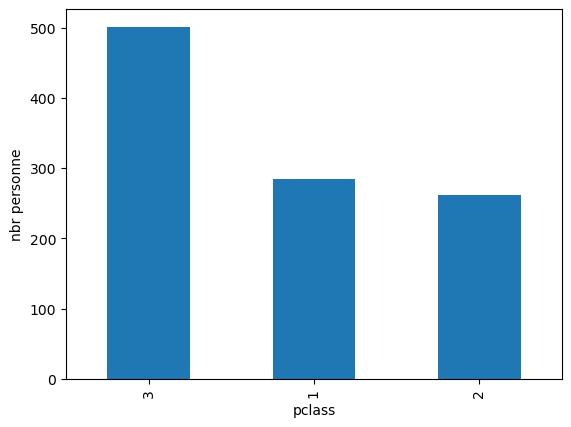

In [15]:
data['pclass'].value_counts().plot.bar()
plt.ylabel('nbr personne')

# Pandas utilise Matplotlib.pyplot !

df.plot()

df.plot.bar()

df.hist(bins=...)

df.plot.scatter(x=..., y=...)

pd.plotting.scatter_matrix(df)

pour plus de perfomance, on utilisera Seaborn


Text(0.5, 0, 'age')

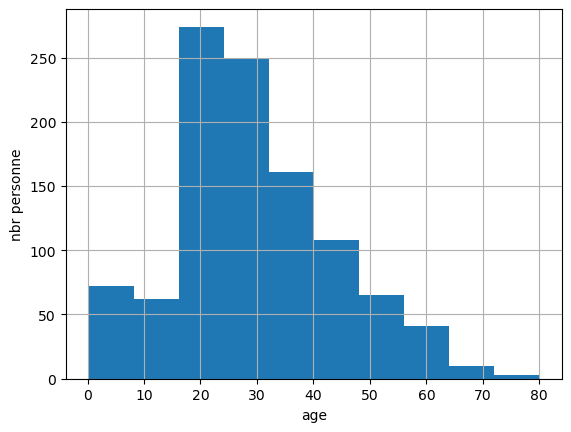

In [16]:
data['age'].hist()
plt.ylabel('nbr personne')
plt.xlabel('age')

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'survived'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

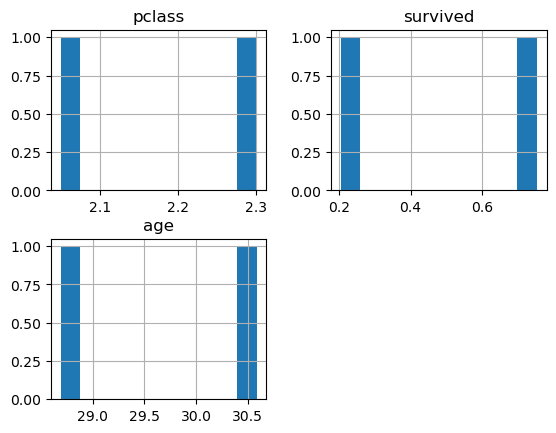

In [17]:
data.groupby(['sex']).mean().hist()

<Axes: xlabel='sex'>

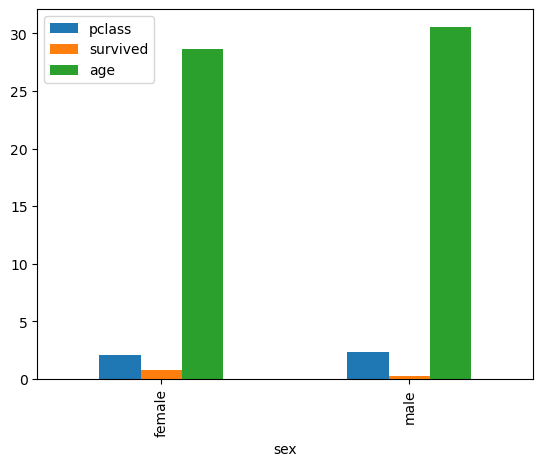

In [18]:
data.groupby(['sex']).mean().plot.bar()

In [19]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [20]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

<Axes: xlabel='sex,pclass'>

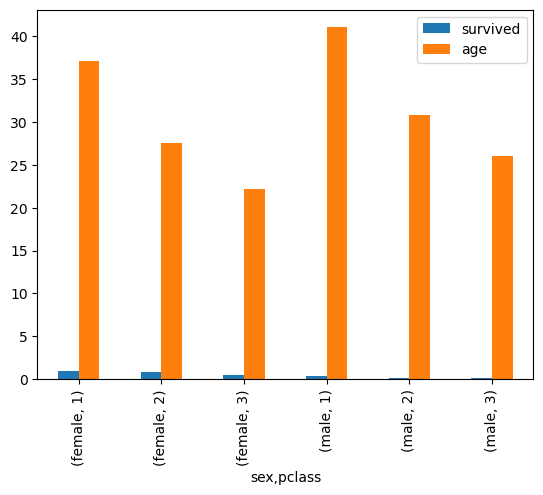

In [21]:
data.groupby(['sex', 'pclass']).mean().plot.bar()

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

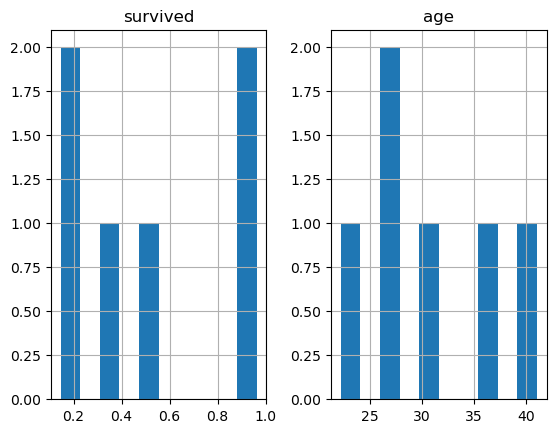

In [22]:
data.groupby(['sex', 'pclass']).mean().hist()

# DataFrame & Series

# Dans Pandas, 2 structeures de donnees:
  .Series
  
  .DataFrames
  
Serie: tableau numpy a 1D (contient son propre index) + axe d'index (independant de Numpy)

On peut changer la colunne d'index par ce qu'on veut exemple : 

In [23]:
#data = data.set_index('pclass')
#data['age']

On peut assembler des series quand elles partagent le meme axe 

# DataFrame : ~ Dictionnaire de Series

    dict['clef'] = valeur
    df['column'] = une serie

data['age'] = serie (ndarray)

data['age'][0:10]  (indexing)

data['age'] < 18   (mask)

data[data['age'] < 18]   (boolean indexing)

data[['age', 'pclass']] = DataFrame

data.iloc[0:2, 0:2] -> localisation par index

data.loc[0:2, 'age']

In [24]:
data['age'][0:10]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

In [25]:
data['age'] < 18

0       False
1        True
2        True
3       False
4       False
        ...  
1301    False
1304     True
1306    False
1307    False
1308    False
Name: age, Length: 1046, dtype: bool

In [26]:
data[data['age'] < 18]['pclass'].value_counts()

pclass
3    106
2     33
1     15
Name: count, dtype: int64

In [27]:
data[data['age'] <18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

<Axes: xlabel='sex,pclass'>

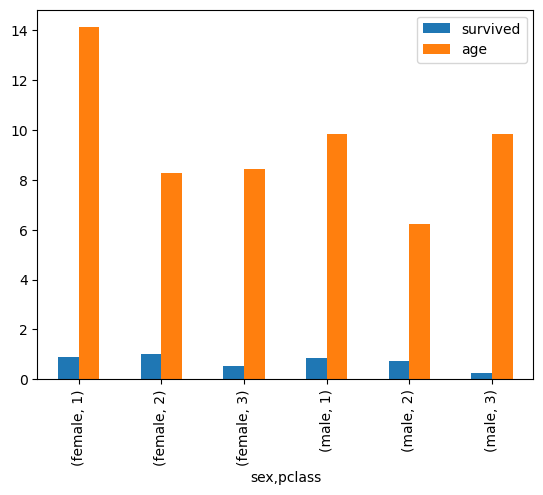

In [28]:
data[data['age'] <18].groupby(['sex', 'pclass']).mean().plot.bar()

In [29]:
data.iloc[0, 0]  # travaille sur les lignes

1

In [30]:
data.iloc[0:2, 0:2]

,pclass,survived
0,1,1
1,1,1


In [31]:
data.loc[0:2, ['age', 'sex']]   # travaille sur les colonnes 

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female



La fonction loc() est utilisée pour accéder à des éléments spécifiques d'un DataFrame Pandas en fonction de leurs indices. Elle prend deux arguments :

index : une liste ou un tableau d'indices de ligne

columns : une liste ou un tableau d'indices de colonne
Si columns est omise, la fonction loc() renvoie un DataFrame contenant les lignes spécifiées par index.

In [ ]:
# Créer un DataFrame
#df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
#df.head()
# Accéder à la première ligne
#df.loc[0]

# Accéder aux deux premières lignes
#df.loc[0:2]

# Accéder à la colonne B
#df.loc[:, 'B']

# Accéder aux lignes 1 et 2 de la colonne B
#df.loc[1:2, 'B']

# Exercice - Feature Engineering
    Modifiez la colonne 'age' afin de creer 4 categories :
    -Cat0 : <20 ans
    -cat1 : 20-30 ans
    -cat2: 30-40 ans
    -cat3: +40 ans

# Solution :

In [32]:
#cat0
#data.loc[data['age'] <=20, 'age'] = 0

In [33]:
#data.loc[(data['age'] >20) & (data['age'] <=30) ,'age'] = 1

In [34]:
#data.loc[(data['age'] >30) & (data['age'] <=40) ,'age'] = 2

In [35]:
#data.loc[data['age'] > 40, 'age'] = 3

In [36]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [37]:
data['age'].value_counts()

age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: count, Length: 98, dtype: int64

In [38]:
data['age'].head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

In [39]:
#data.groupby(['age']).mean()

# Methode 2:

# Fonctions Map et Apply

La fonction map() applique une fonction Sur chaque element d'une colonne

Data['age'].map(lambda x:x+1)

La fonction apply() applique une fonction sur chaque element du dataframe 

In [40]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [41]:
data['age'].map(lambda x:x+1)

0       30.0000
1        1.9167
2        3.0000
3       31.0000
4       26.0000
         ...   
1301    46.5000
1304    15.5000
1306    27.5000
1307    28.0000
1308    30.0000
Name: age, Length: 1046, dtype: float64

In [42]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans' 

la fonction map() nous permet de traiter les donnees ligne apres ligne 

In [43]:
data['age'].map(category_ages)

0       20-30 ans
1         <20 ans
2         <20 ans
3       20-30 ans
4       20-30 ans
          ...    
1301      +40 ans
1304      <20 ans
1306    20-30 ans
1307    20-30 ans
1308    20-30 ans
Name: age, Length: 1046, dtype: object

# Categories Numeriques

Data['sex'].map({'male':0, 'female':1})

Data['sex'].replace(['male', 'female'],[0,1])

Data['sex'].astype('category').cat.codes

In [44]:
data['sex'].map({'male':0, 'female':1})

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [45]:
data['sex'].replace(['male', 'female'],[0,1])

0       1
1       0
2       1
3       0
4       1
       ..
1301    0
1304    1
1306    0
1307    0
1308    0
Name: sex, Length: 1046, dtype: int64

In [46]:
data['sex'].astype('category').cat.codes #dans le cas ou on a tous plein de categorie
# comme dans le cas de la securiter routier 

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8

In [47]:
import seaborn as sns

C:\Users\maiss\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


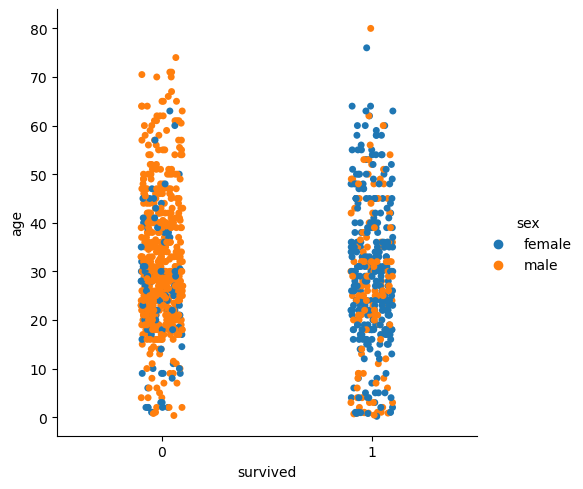

In [48]:
sns.catplot(x='survived', y='age', data=data, hue='sex') 

# Cours2 Pandas:
    -DateTimeIndex
    
    -resample() & agg()
    
    -rolling() : mouving average
    
    -ewm() : Exponential weigthed function
    
    -merge() : inner, outer, etc...
    
    -corr()
    
    -Traiding Strategy !
    
    -map() + apply() + replace() + cat.codes

# Bitcoin et TimeSeries

In [49]:
shutil.copy( r"C:\\Users\\maiss\\OneDrive\\Documents\\IA\\BTC-EUR.csv", ".")

'.\\BTC-EUR.csv'

In [50]:
bitcoin = pd.read_csv('BTC-EUR.csv')

In [51]:
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
1,2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2,2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
3,2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
4,2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


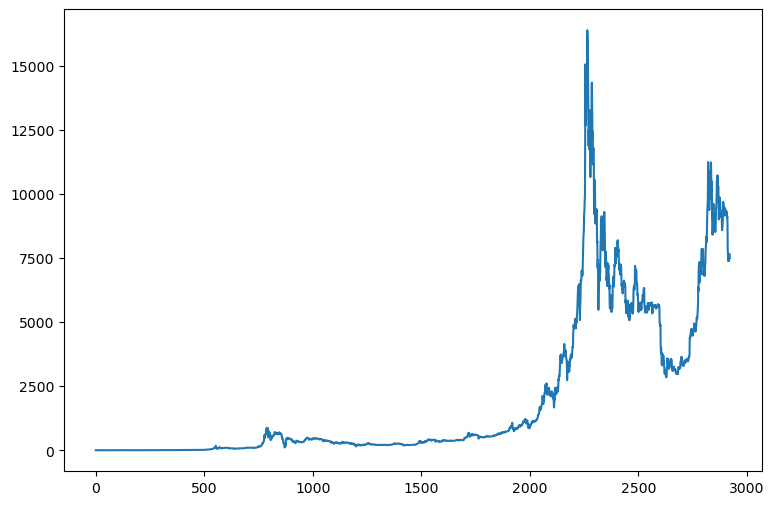

In [52]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

# On veut que la colonne Close se definie par la date 
alors on maite la date en index 
# Pour avoir un index de type Datetime:
# - index_col = 'Date'
# - parse_dates = True

# TimeSeries

In [53]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date')

In [54]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


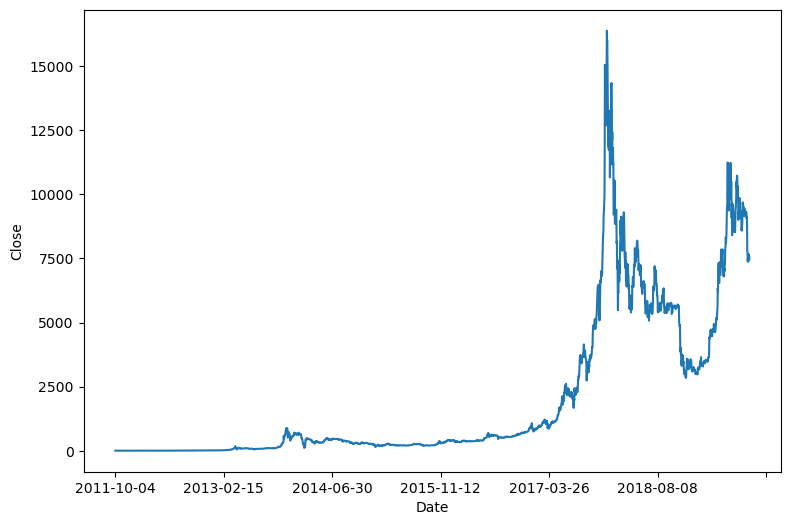

In [55]:
bitcoin['Close'].plot(figsize=(9,6))
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

Et ce n'est pas fini on doit interpreter a pandas que cette colonne doit etre traiter comme etant une date  

In [56]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [57]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-10-04,3.700,3.821,3.746,3.750,3.750,1357
2011-10-05,3.750,3.820,3.650,3.676,3.676,3349
2011-10-06,3.676,3.743,3.450,3.550,3.550,6642
2011-10-07,3.550,3.590,2.900,3.293,3.293,7135
2011-10-08,3.293,3.283,2.872,2.890,2.890,2007


In [58]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

On peut faire de l'indexing sur les dates !

    -bitcoin['2019']['Close']
    
    -bitcoin['2019-09']['Close']
    
    -bitcoin['2016':'2019']['Close']
    
    -bitcoin.loc['2016':'2019','Close']

In [59]:
bitcoin.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [60]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

In [61]:
bitcoin.loc['2019']['Close']

Date
2019-01-01    3372.090088
2019-01-02    3468.399902
2019-01-03    3345.330078
2019-01-04    3370.939941
2019-01-05    3359.159912
                 ...     
2019-09-30    7626.029785
2019-10-01    7625.560059
2019-10-02    7655.250000
2019-10-03    7516.790039
2019-10-04    7487.083496
Name: Close, Length: 277, dtype: float64

<Axes: xlabel='Date'>

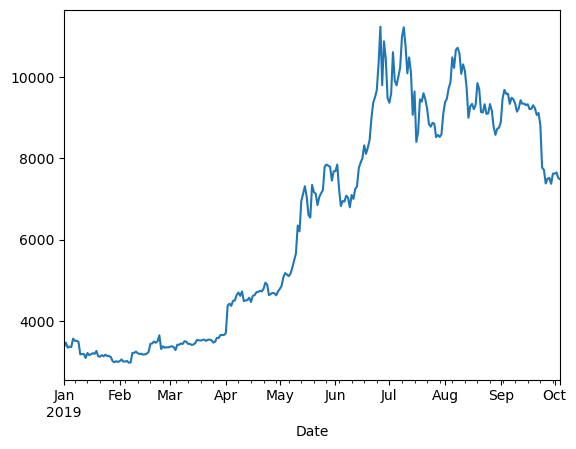

In [62]:
bitcoin.loc['2019']['Close'].plot()

<Axes: xlabel='Date'>

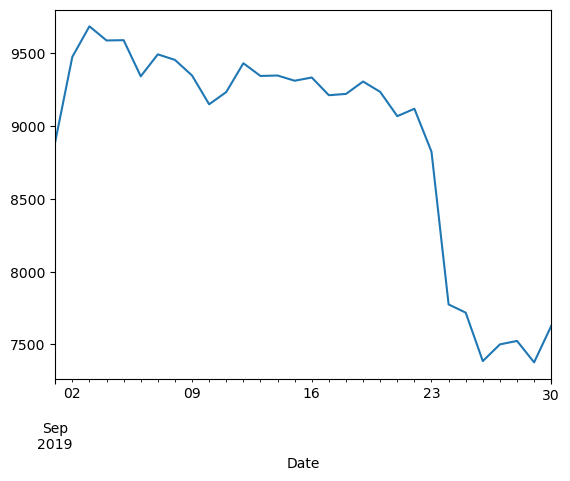

In [63]:
bitcoin.loc['2019-09']['Close'].plot()

<Axes: xlabel='Date'>

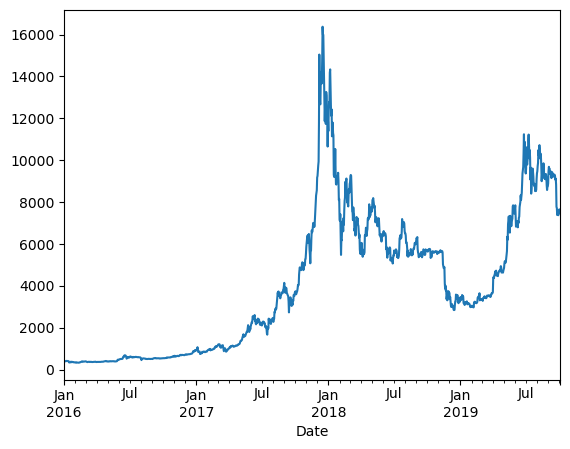

In [64]:
bitcoin.loc['2016':'2019']['Close'].plot()

<Axes: xlabel='Date'>

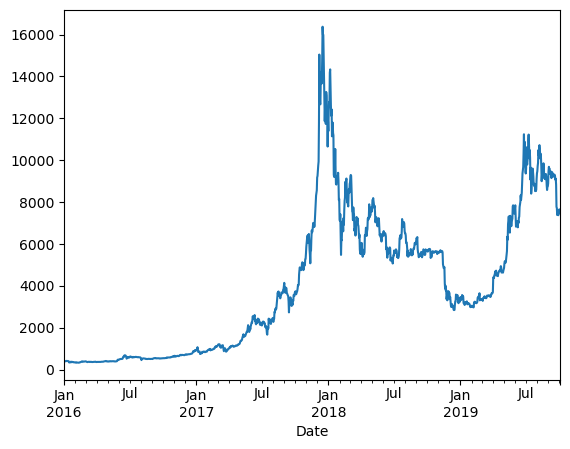

In [65]:
bitcoin.loc['2016':'2019','Close'].plot()

Pandas s'adapte au format de date :

'yyyy-mm-jj'

'yyyy/mm/jj'

'yyyy.mm.jj'

'yyyy mm jj'

si jamais, utilisez la fonction :

pd.to_datetime('yyyy/mm/jj')

Timestamp('yyyy-mm-jj hh:min:s')

# Resample 

On peut regrouper nos donnees selon une frequence 

# CodeMeaning

Y  Year

M  Month

W  Week

D  Day

h  Hour

m  Minute

s  Secound

ms  Millisecound

us  Microsecond

ns  Nanosecond

Et une fois qu'on les regroupes :
   ->mean()std()min()max()sum().

In [66]:
#bitcoin.loc['2019']['Close'].resample('M').plot()
#plt.show()

Date
2019-01-31    Axes(0.125,0.11;0.775x0.77)
2019-02-28    Axes(0.125,0.11;0.775x0.77)
2019-03-31    Axes(0.125,0.11;0.775x0.77)
2019-04-30    Axes(0.125,0.11;0.775x0.77)
2019-05-31    Axes(0.125,0.11;0.775x0.77)
2019-06-30    Axes(0.125,0.11;0.775x0.77)
2019-07-31    Axes(0.125,0.11;0.775x0.77)
2019-08-31    Axes(0.125,0.11;0.775x0.77)
2019-09-30    Axes(0.125,0.11;0.775x0.77)
2019-10-31    Axes(0.125,0.11;0.775x0.77)
Freq: M, Name: Close, dtype: object

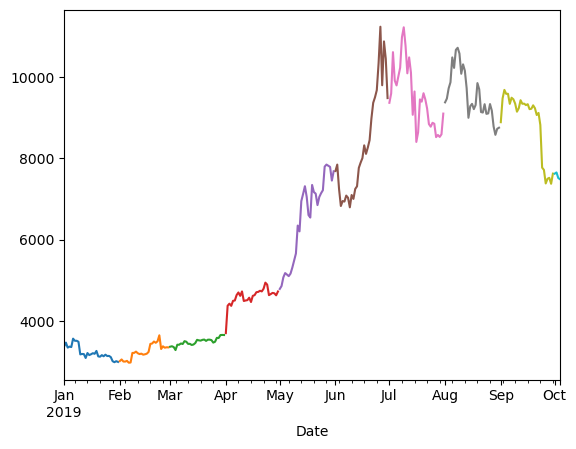

In [67]:
# Regroupez les données par mois 
bitcoin.loc['2019']['Close'].groupby(pd.Grouper(freq='M')).plot()

In [68]:
bitcoin.loc['2019']['Close'].resample('M')

# La différence entre les deux approches réside dans la façon dont elles traitent les opérations de groupement et d'agrégation. Voyons les deux approches en détail :

groupby avec pd.Grouper :

bitcoin.loc['2019']['Close'].groupby(pd.Grouper(freq='M')).plot()


Cette approche utilise la méthode groupby avec pd.Grouper pour regrouper les données par mois. La méthode plot est appelée sur chaque groupe, ce qui génère un graphique distinct pour chaque mois.


resample :

bitcoin.loc['2019']['Close'].resample('M').plot()

plt.show()


Cette approche utilise la méthode resample pour regrouper les données par mois. Cependant, resample est principalement utilisé avec des opérations d'agrégation, comme mean, sum, etc. Dans votre exemple, vous avez utilisé plot() directement après resample, ce qui provoque une erreur car l'objet résultant n'est pas un DataFrame ou une Series pouvant être directement tracé.


Pour faire fonctionner l'approche avec resample, vous pouvez effectuer une opération d'agrégation avant d'appeler plot. Par exemple, si vous voulez tracer la moyenne mensuelle, vous pouvez le faire comme suit :


bitcoin.loc['2019']['Close'].resample('M').mean().plot()

plt.show()

En résumé, l'approche avec groupby et pd.Grouper fonctionne directement avec plot car elle génère un graphique pour chaque groupe, tandis que l'approche avec resample nécessite une opération d'agrégation avant de pouvoir être tracée.

<Axes: xlabel='Date'>

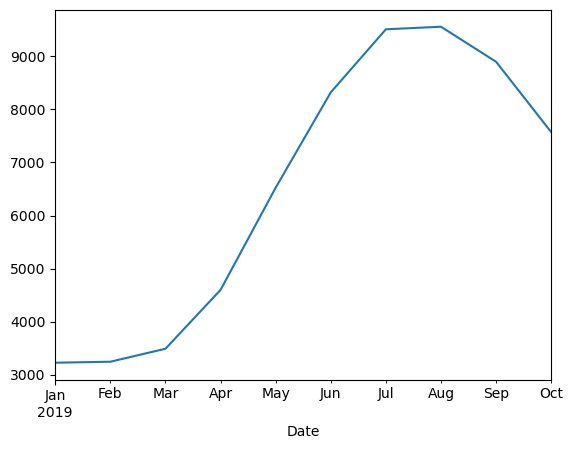

In [69]:
bitcoin.loc['2019']['Close'].resample('M').mean().plot()

<Axes: xlabel='Date'>

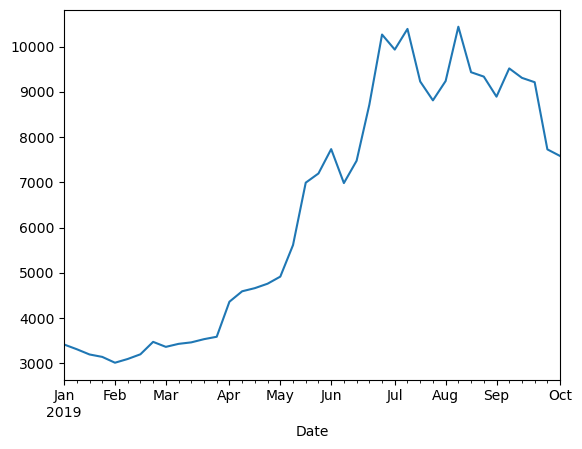

In [70]:
bitcoin.loc['2019']['Close'].resample('W').mean().plot()

<Axes: xlabel='Date'>

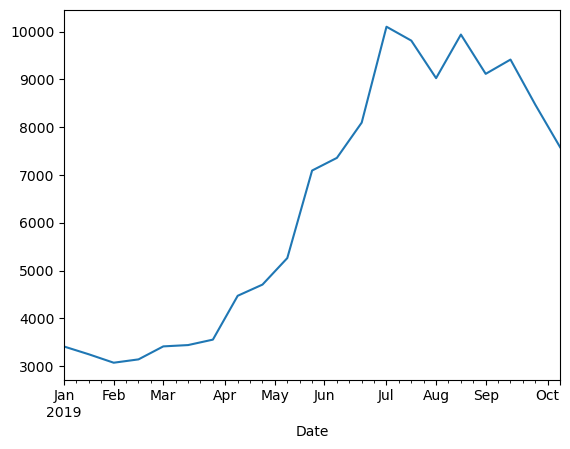

In [71]:
bitcoin.loc['2019','Close'].resample('2W').mean().plot()

<Axes: xlabel='Date'>

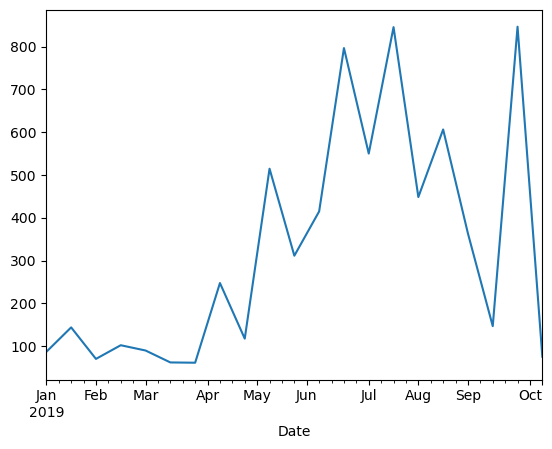

In [72]:
bitcoin.loc['2019']['Close'].resample('2W').std().plot()

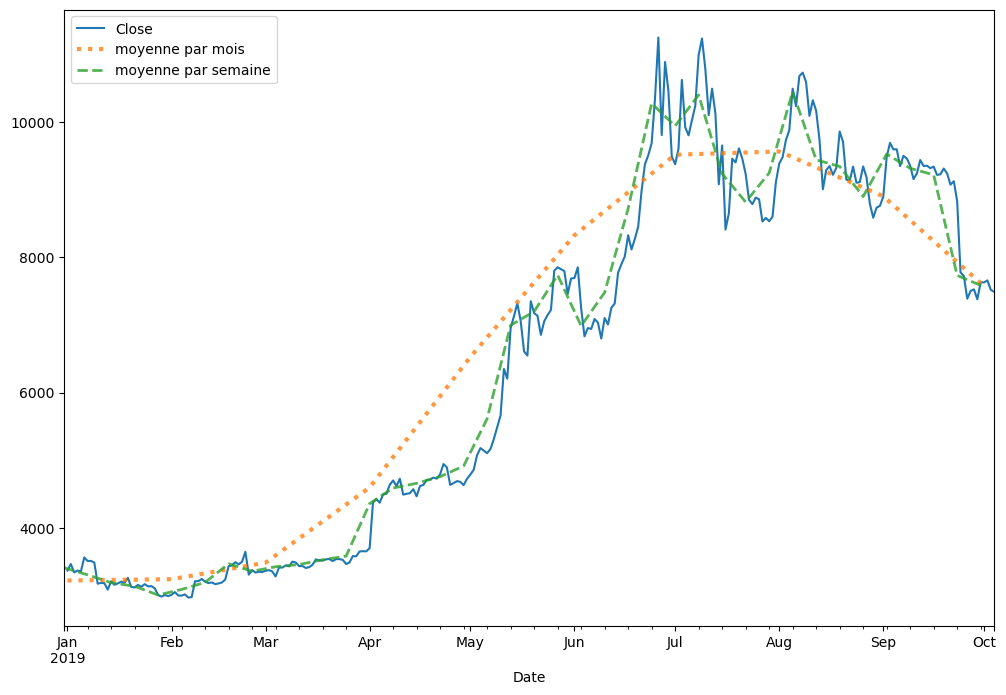

In [73]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019','Close'].plot()
bitcoin.loc['2019']['Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019']['Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

# Agrégat : .agg()

Cette fonction nos permet de regrouper en un seul tableau plusieurs statestique voulu faire par dessu .resample()

In [74]:
bitcoin['Close'].resample('W').agg(['mean','std', 'min', 'max'])

,mean,std,min,max
Date,,,,
2011-10-09,3.356167,0.363120,2.890000,3.750000
2011-10-16,2.908000,0.177088,2.587000,3.090000
2011-10-23,1.910714,0.258091,1.620000,2.274000
2011-10-30,2.174000,0.244941,1.872000,2.574000
2011-11-06,2.281000,0.087130,2.170000,2.420000
...,...,...,...,...
2019-09-08,9518.921596,112.282309,9342.450195,9685.990234
2019-09-15,9309.785715,91.611734,9149.929688,9432.070313
2019-09-22,9213.828543,94.554136,9068.450195,9334.099609


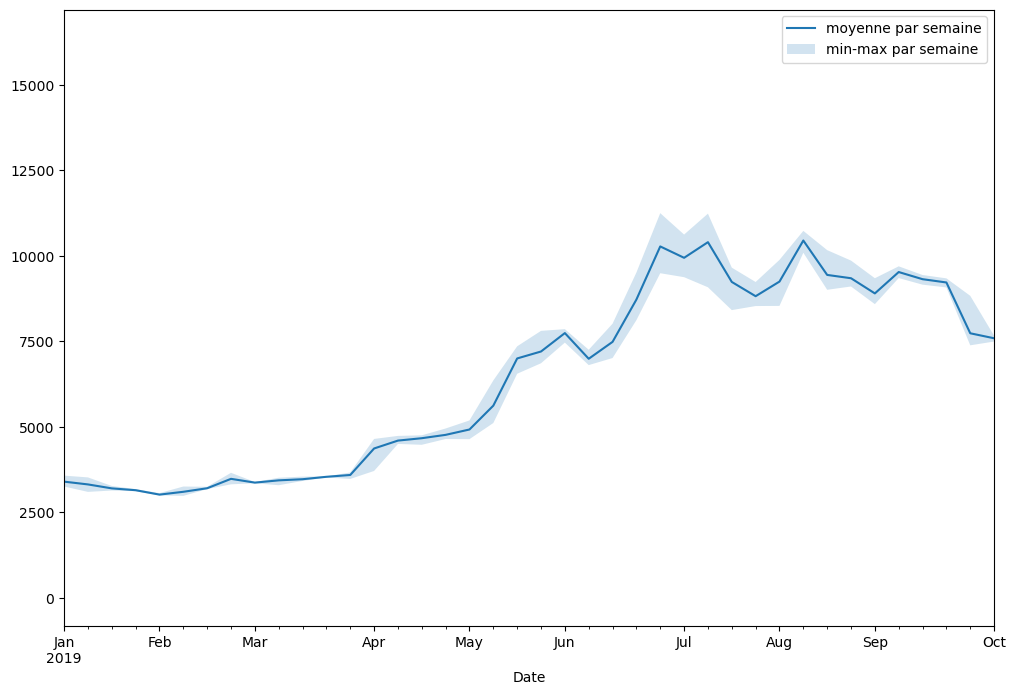

In [75]:
m = bitcoin['Close'].resample('W').agg(['mean','std', 'min', 'max'])
plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')
plt.legend()
plt.show()

# Moving Average

Au lieu de faire la moyenne de toutes les valeurs...

-> On fait la moyenne sur une fenetre de valeurs 

On definie une fonction << roulante >>

avec la fonction pd.rolling(window)

<Axes: xlabel='Date'>

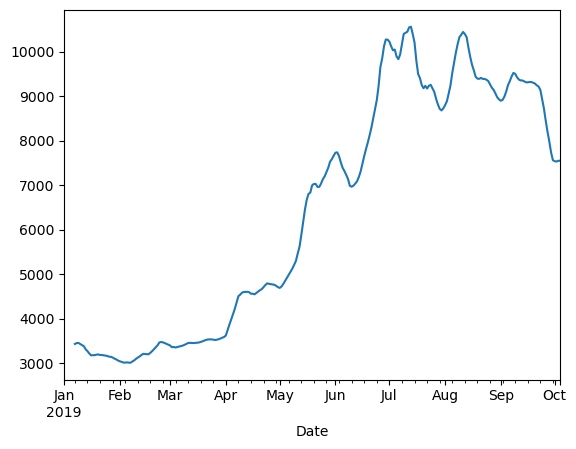

In [76]:
bitcoin.loc['2019','Close'].rolling(window=7).mean().plot()

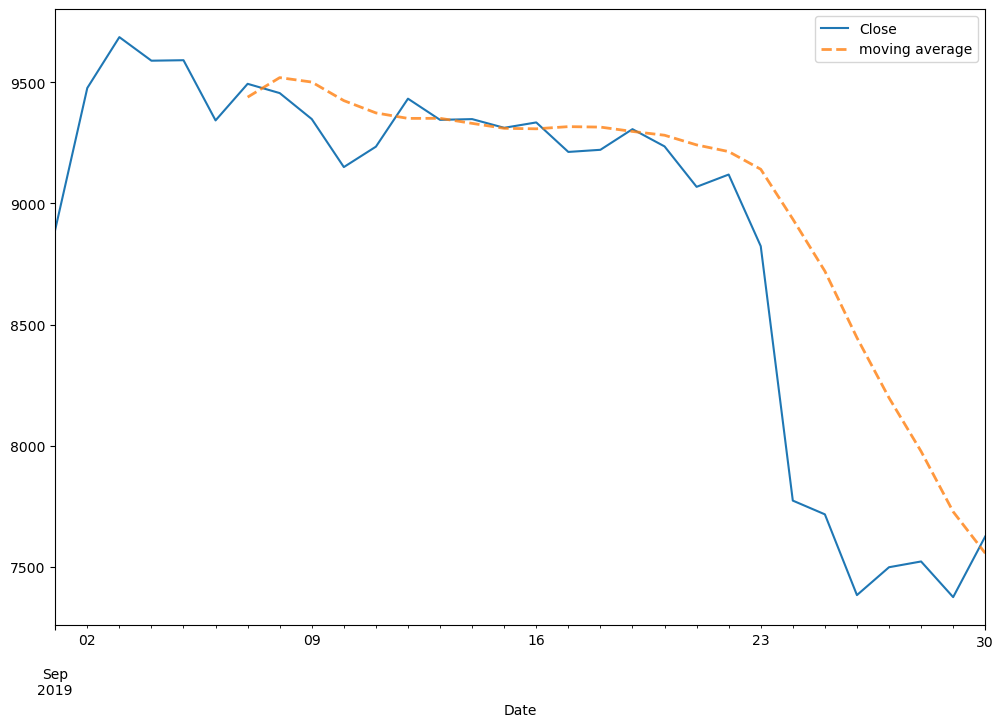

In [77]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09','Close'].rolling(window=7).mean().plot(label='moving average', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

dans ce cas on remarque un petit decalage car 

rollong(window, center=False).mean()

pour le corriger :

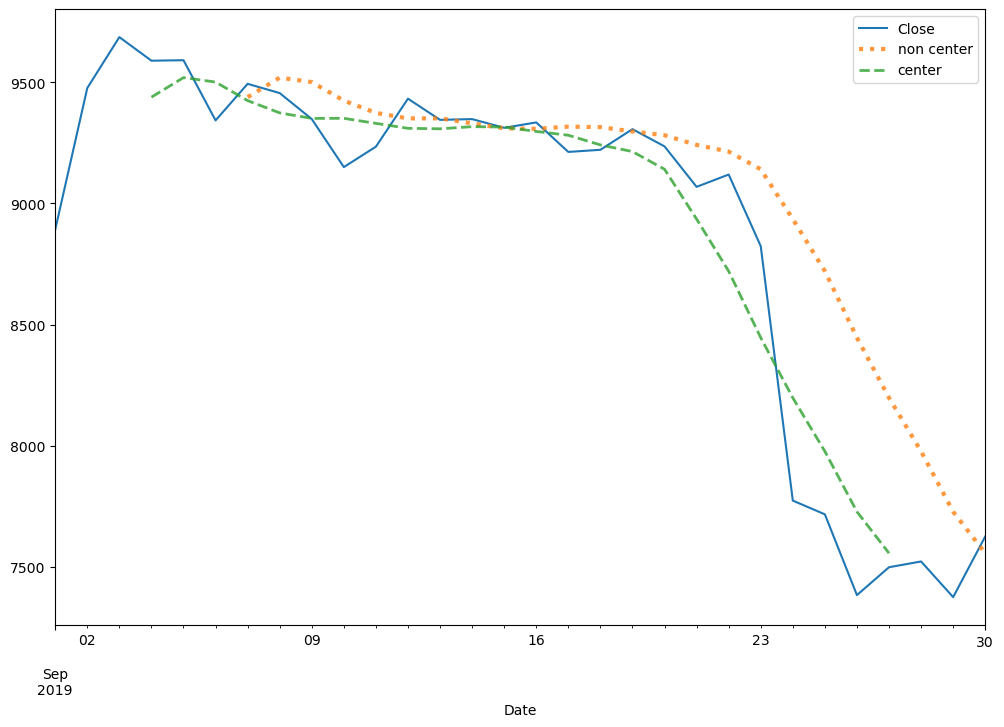

In [78]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09','Close'].rolling(window=7).mean().plot(label='non center', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09','Close'].rolling(window=7, center=True).mean().plot(label='center', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

# Exp Weighted function

les valeurs perdent peu a peu du poids avec le temps

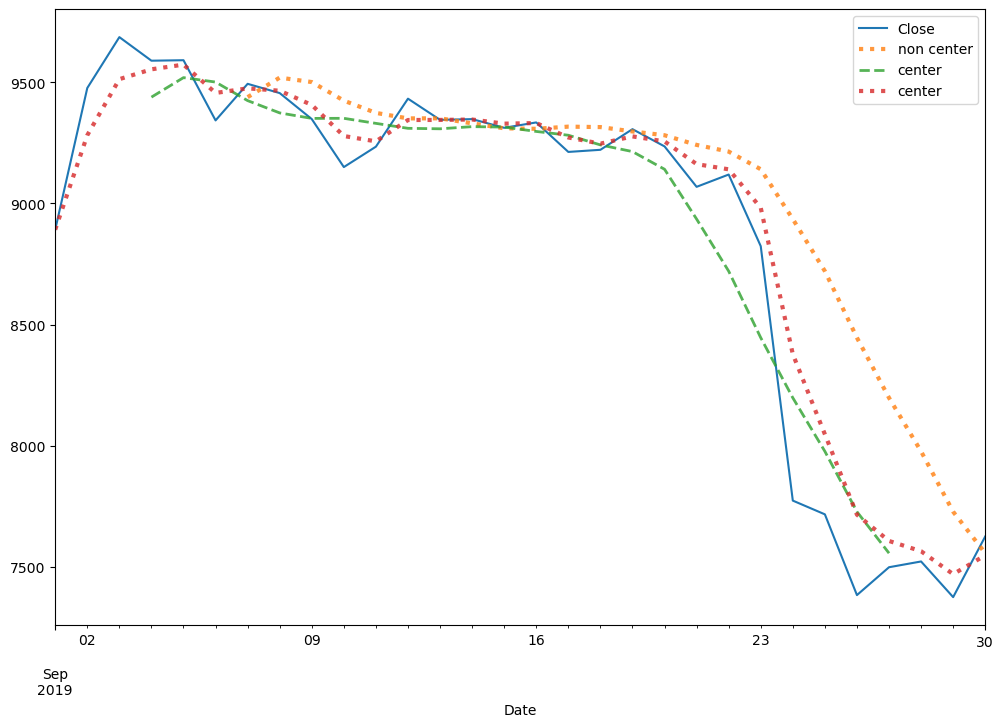

In [79]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09','Close'].rolling(window=7).mean().plot(label='non center', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09','Close'].rolling(window=7, center=True).mean().plot(label='center', lw=2, ls='--', alpha=0.8)
bitcoin.loc['2019-09','Close'].ewm(alpha=0.5).mean().plot(label='center', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

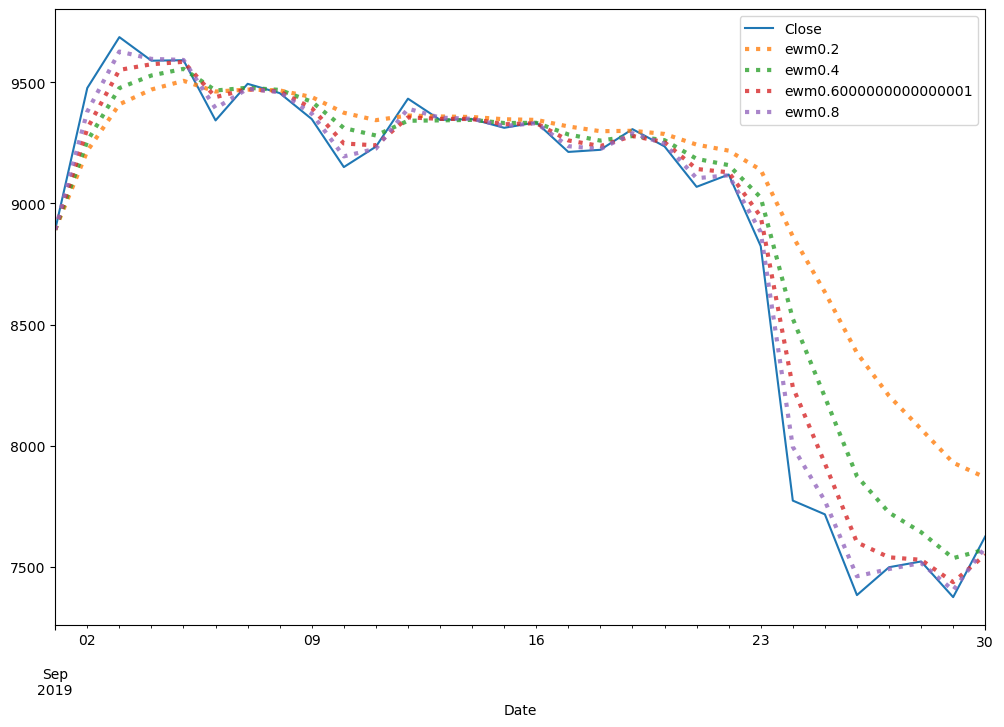

In [80]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09','Close'].ewm(alpha=i).mean().plot(label=f'ewm{i}', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

# Assembler des datasets

-merge() : inner, outer, etc...

-corr()

In [81]:
shutil.copy( r"C:\\Users\\maiss\\OneDrive\\Documents\\IA\\ETH-EUR.csv", ".")

'.\\ETH-EUR.csv'

In [82]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

In [83]:
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,0.593,20.000,0.5930,2.56,2.56,15200
2015-08-08,2.560,2.598,0.5616,0.65,0.65,32816
2015-08-09,0.650,0.800,0.5235,0.70,0.70,4041
2015-08-10,0.700,0.750,0.5850,0.68,0.68,5645
2015-08-11,0.680,1.008,0.5915,0.95,0.95,21607


<Axes: xlabel='Date'>

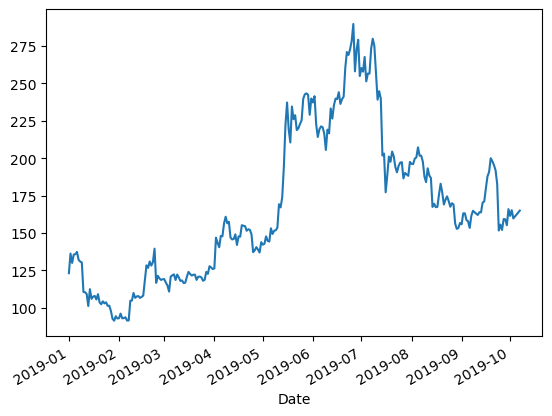

In [84]:
ethereum.loc['2019']['Close'].plot()

# MERGE & JOIN

In [85]:
pd.merge(bitcoin, ethereum, on='Date',suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,255.710007,258.880005,253.639999,256.250000,256.250000,1446808,0.593000,20.000000,0.593000,2.560000,2.560000,15200
2015-08-08,256.250000,257.029999,239.279999,240.199997,240.199997,1426996,2.560000,2.598000,0.561600,0.650000,0.650000,32816
2015-08-09,240.199997,246.110001,239.039993,243.910004,243.910004,797790,0.650000,0.800000,0.523500,0.700000,0.700000,4041
2015-08-10,243.910004,248.039993,240.779999,241.679993,241.679993,1135445,0.700000,0.750000,0.585000,0.680000,0.680000,5645
2015-08-11,241.679993,247.190002,240.399994,245.759995,245.759995,1472221,0.680000,1.008000,0.591500,0.950000,0.950000,21607
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-29,7523.009766,7541.020020,7247.169922,7375.950195,7375.950195,39755968,159.130005,159.779999,150.610001,155.160004,155.160004,7857348
2019-09-30,7375.950195,7667.890137,7075.589844,7626.029785,7626.029785,101457908,155.160004,166.649994,151.229996,165.910004,165.910004,15659055
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,75644316,165.910004,170.710007,159.330002,161.410004,161.410004,11427525


<Axes: xlabel='Date'>

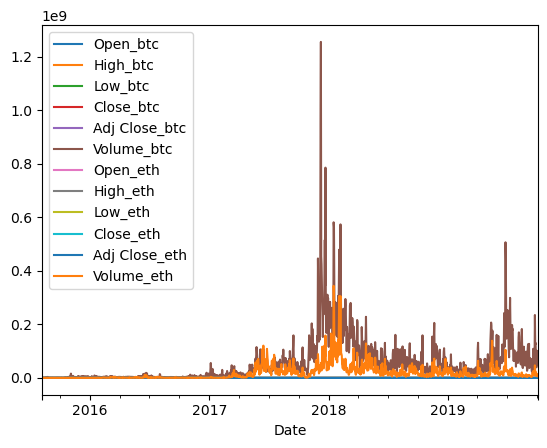

In [86]:
pd.merge(bitcoin, ethereum, on='Date',suffixes=('_btc', '_eth')).plot()

<Axes: xlabel='Date'>

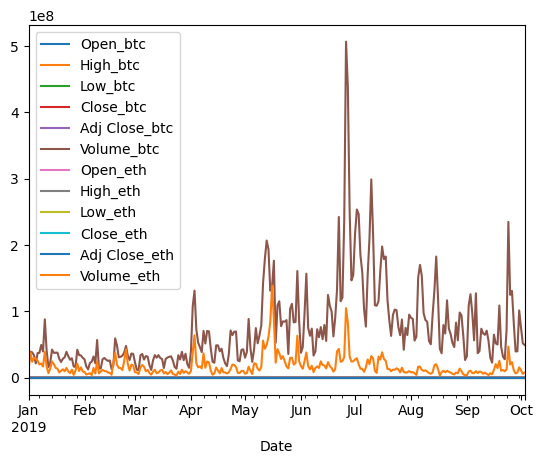

In [87]:
pd.merge(bitcoin, ethereum, on='Date',suffixes=('_btc', '_eth')).loc['2019'].plot()

In [88]:
pd.merge(bitcoin, ethereum, on='Date',suffixes=('_btc', '_eth'), how='inner')

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,255.710007,258.880005,253.639999,256.250000,256.250000,1446808,0.593000,20.000000,0.593000,2.560000,2.560000,15200
2015-08-08,256.250000,257.029999,239.279999,240.199997,240.199997,1426996,2.560000,2.598000,0.561600,0.650000,0.650000,32816
2015-08-09,240.199997,246.110001,239.039993,243.910004,243.910004,797790,0.650000,0.800000,0.523500,0.700000,0.700000,4041
2015-08-10,243.910004,248.039993,240.779999,241.679993,241.679993,1135445,0.700000,0.750000,0.585000,0.680000,0.680000,5645
2015-08-11,241.679993,247.190002,240.399994,245.759995,245.759995,1472221,0.680000,1.008000,0.591500,0.950000,0.950000,21607
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-29,7523.009766,7541.020020,7247.169922,7375.950195,7375.950195,39755968,159.130005,159.779999,150.610001,155.160004,155.160004,7857348
2019-09-30,7375.950195,7667.890137,7075.589844,7626.029785,7626.029785,101457908,155.160004,166.649994,151.229996,165.910004,165.910004,15659055
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,75644316,165.910004,170.710007,159.330002,161.410004,161.410004,11427525


<Axes: xlabel='Date'>

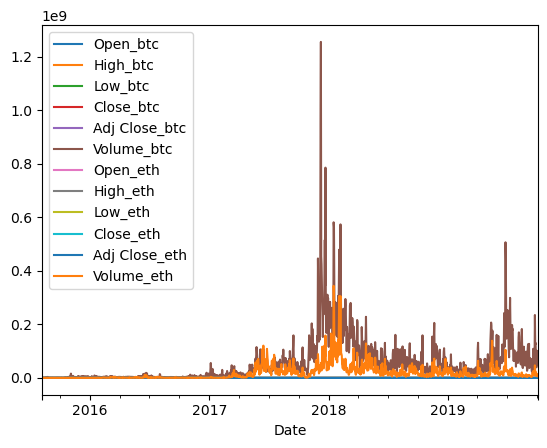

In [89]:
pd.merge(bitcoin, ethereum, on='Date',suffixes=('_btc', '_eth'), how='inner').plot()

In [90]:
pd.merge(bitcoin, ethereum, on='Date',suffixes=('_btc', '_eth'), how='outer')

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2011-10-04,3.700000,3.821000,3.746000,3.750000,3.750000,1.357000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-05,3.750000,3.820000,3.650000,3.676000,3.676000,3.349000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-06,3.676000,3.743000,3.450000,3.550000,3.550000,6.642000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-07,3.550000,3.590000,2.900000,3.293000,3.293000,7.135000e+03,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-08,3.293000,3.283000,2.872000,2.890000,2.890000,2.007000e+03,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,7626.029785,7818.279785,7535.799805,7625.560059,7625.560059,7.564432e+07,165.910004,170.710007,159.330002,161.410004,161.410004,11427525.0
2019-10-02,7625.560059,7663.270020,7489.770020,7655.250000,7655.250000,5.187133e+07,161.410004,165.740005,159.699997,165.240005,165.240005,5760811.0
2019-10-03,7655.250000,7685.930176,7379.220215,7516.790039,7516.790039,4.943731e+07,165.240005,165.520004,154.960007,159.690002,159.690002,7711746.0


In [91]:
btc_eth = pd.merge(bitcoin, ethereum, on='Date',suffixes=('_btc', '_eth'), how='inner')

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

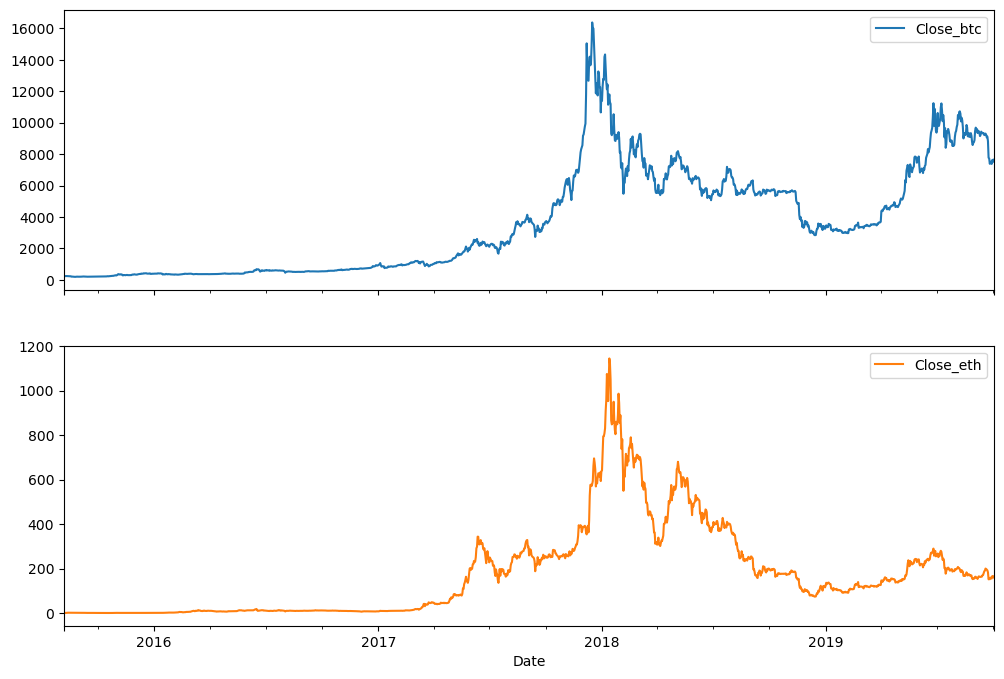

In [92]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True ,figsize=(12,8))

La corrélation entre deux graphes (ou séries temporelles) mesure la similarité dans le mouvement ou le comportement des deux séries au fil du temps. Plus précisément, la corrélation entre deux séries temporelles indique dans quelle mesure les variations dans une série correspondent aux variations dans l'autre série.

La corrélation peut être positive, négative ou nulle :

Corrélation positive : Les deux séries évoluent dans la même direction. Lorsque l'une augmente, l'autre a tendance à augmenter également, et vice versa.

Corrélation négative : Les deux séries évoluent dans des directions opposées. Lorsque l'une augmente, l'autre a tendance à diminuer, et vice versa.

Corrélation nulle : Il n'y a pas de relation linéaire apparente entre les deux séries.

La corrélation est souvent quantifiée à l'aide du coefficient de corrélation de Pearson. Ce coefficient mesure la force et la direction d'une relation linéaire entre deux variables. Il varie de -1 (corrélation négative parfaite) à 1 (corrélation positive parfaite), avec 0 indiquant aucune corrélation.

In [93]:
correlation = btc_eth[['Close_btc', 'Close_eth']].loc['2019-09'].corr()

<Axes: >

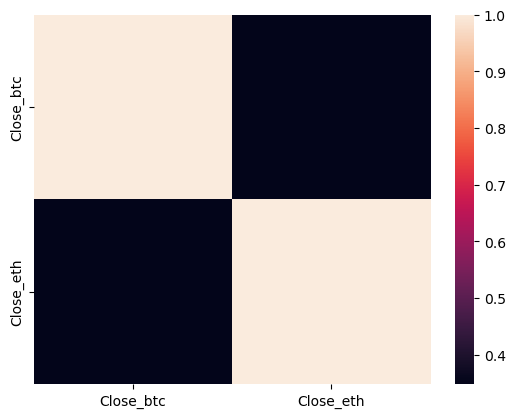

In [94]:
import seaborn as sns
sns.heatmap(correlation)

# Exercice:  Trading Strategy

# Turtle Strategy

COMMENT PROCEDER ?

1. Utiliser rolling() pour calculer:

      . max sur les 28 derniers jours
      
      . min sur les 28 derniers jours
      
2. Boolean indexing:

      . Si 'Close' > max28 alors Buy = 1
      
      . Si 'Close' < min28 alors Sell = -1

indice: Initialiser des colonnes 'Buy' et 'Sell' avec des 0.

bitcoin['Buy'] = np.zeros(len(bitcoin))

bitcoin['Sell'] = np.zeros(len(bitcoin))

<Axes: xlabel='Date'>

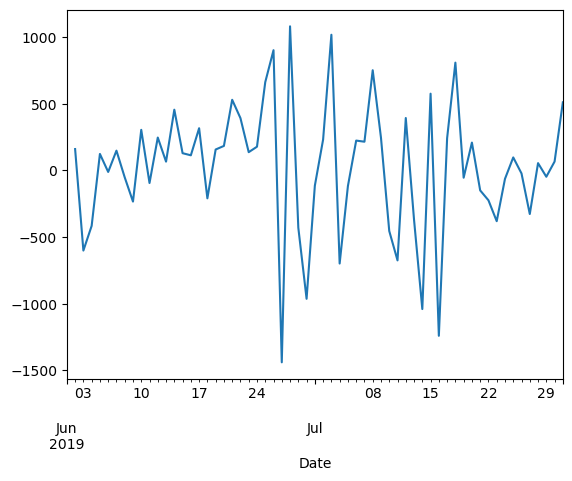

In [95]:
bitcoin['Close']['2019-06':'2019-07'].diff().plot()

In [96]:
#%matplotlib

In [110]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [111]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

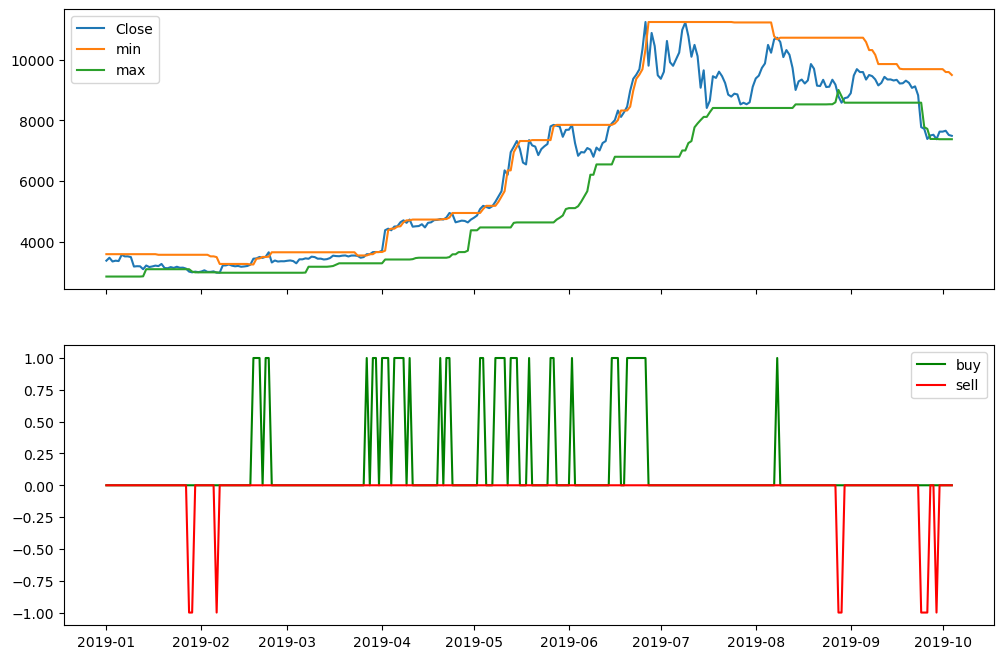

In [112]:
start = '2019'
end = '2019'
fig , ax = plt.subplots(2, figsize=(12,8), sharex=True)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].legend(['Close', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])

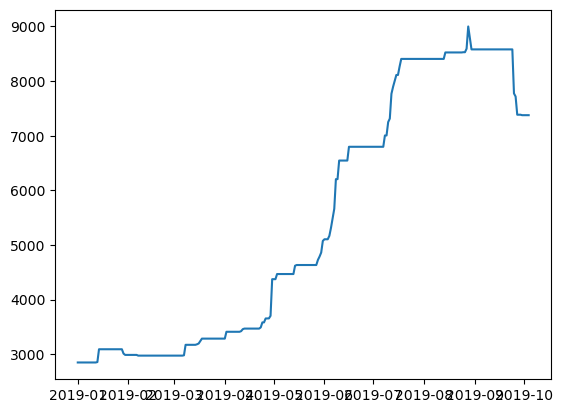

In [113]:
plt.plot(data['RollingMin'][start:end])

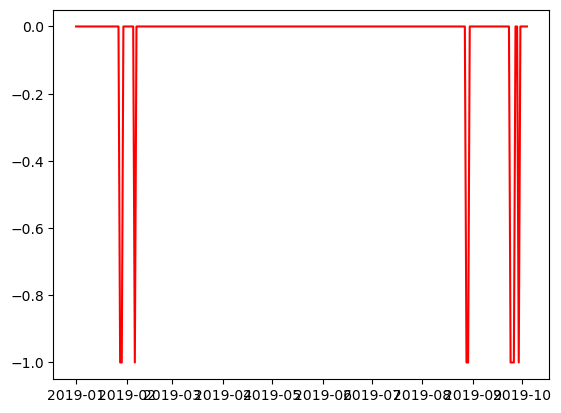

In [114]:
plt.plot(data['Sell'][start:end], c='r')